In [66]:
%config IPCompiler.greedy=True #TAB代码自动提示

In [67]:
from tensorflow import keras

### 加载Fashion MNIST数据集


In [68]:
fashion_mmist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mmist.load_data()

In [69]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [70]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

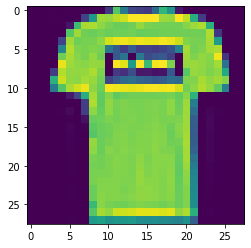

In [71]:
# 查看图片
import matplotlib.pyplot as plt
plt.imshow(train_images[1])

### 构造模型
三层结构 
1. 输入层 
2. 中间层 
3. 输出层

因为是10个类别(0 - 9)，所以输出层是10个神经元

In [72]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**激活函数**
- relu
- softmax

In [73]:
# model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(28, 28)))
# model.add(keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [74]:
# 查看模型神经网络结构
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [75]:
# 编译模型
model.compile(optimizer=tf.optimizers.Adam(), 
              loss=tf.losses.sparse_categorical_crossentropy,
               metrics=["accuracy"])

In [76]:
# 为了让训练的效果更好，可以对数据进行scale
train_images = train_images / 255


In [77]:
# 可以通过定义callback的方式，当loss满足一定的条件后自动终止训练
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 0.10):
            print('\nLoss is enouth so stop the training')
            self.model.stop_training = True

In [78]:
# 训练模型
callbacks = myCallback()
# model.fit(train_images, train_labels, epochs=50, callbacks=[callbacks])
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4940 - accuracy: 0.8235
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3713 - accuracy: 0.8649
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3355 - accuracy: 0.8770
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3091 - accuracy: 0.8859
Epoch 5/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2914 - accuracy: 0.8919


In [79]:
# 评估模型
test_images_scaled = test_images / 255
model.evaluate(test_images_scaled, test_labels)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3486 - accuracy: 0.8733


[0.3486426297068596, 0.8733]

[[3.8230032e-06 1.1137581e-08 3.8666533e-07 8.7471248e-09 2.4321415e-07
  1.2178413e-02 2.6918772e-06 2.0721849e-02 1.0848347e-05 9.6708173e-01]]
9
9


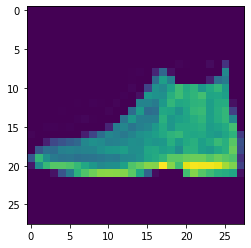

In [80]:
# 使用模型进行预测
print(model.predict([[test_images[0]/255]]))

import numpy as np
print(np.argmax(model.predict([[test_images[0]/255]])))
print(test_labels[0])
plt.imshow(test_images[0])